# Work balance analysis of Facebook company's employees in California 

### Group H: Eugenio Baldo, Stefania Sferragatta, Clara Lecce

In [2]:
from script import *

In [7]:
apple = pd.read_csv('datasets/apple.csv')
del apple['Unnamed: 0']
apple.columns= ['company','location','job-title','overall_ratings','work_balance_stars','culture_values_stars','carrer_opportunities_stars','comp_benefit_stars','senior_mangemnet_stars','helpful_count','year']
fields = ['overall_ratings','work_balance_stars','culture_values_stars','carrer_opportunities_stars','comp_benefit_stars','senior_mangemnet_stars']
summary_apple = apple[fields].describe().transpose()

In [8]:
summary_apple

,count,mean,std,min,25%,50%,75%,max
overall_ratings,7583.0,3.894105,1.091922,1.0,3.0,4.0,5.0,5.0
work_balance_stars,7583.0,3.332309,1.266562,1.0,2.0,3.3,4.0,5.0
culture_values_stars,7583.0,4.073137,1.088088,1.0,4.0,4.1,5.0,5.0
carrer_opportunities_stars,7583.0,3.364078,1.220753,1.0,3.0,3.4,4.0,5.0
comp_benefit_stars,7583.0,3.978069,1.000391,1.0,3.0,4.0,5.0,5.0
senior_mangemnet_stars,7583.0,3.413082,1.295530,1.0,3.0,4.0,4.5,5.0


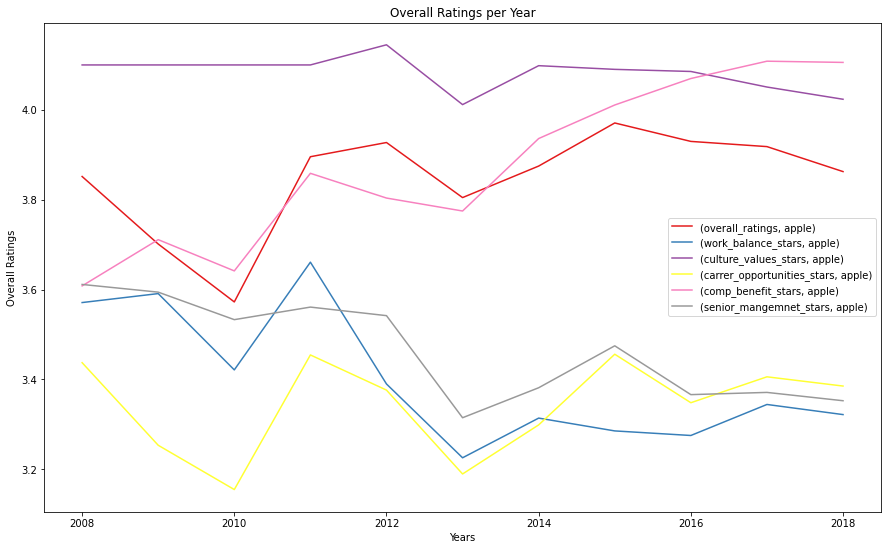

In [9]:
#Ratings over time for Facebook
fig, ax = plt.subplots(figsize=(15,9))
keys = ['year','company']
lines = ['overall_ratings','work_balance_stars','culture_values_stars','carrer_opportunities_stars','comp_benefit_stars','senior_mangemnet_stars']
apple.groupby(keys)[lines].mean().unstack().plot(ax=ax,colormap = 'Set1')
_ = plt.xlabel("Years")
_ = plt.ylabel("Overall Ratings")
_ = plt.title("Overall Ratings per Year")
_ = plt.legend()

In [10]:
corr_app = corr_matrix(apple)
corr_app

,overall_ratings,work_balance_stars,culture_values_stars,carrer_opportunities_stars,comp_benefit_stars,senior_mangemnet_stars,helpful_count,Job_code,Locations_code
overall_ratings,1.000000,0.562918,0.652562,0.653245,0.509659,0.684976,-0.121660,-0.091089,0.021608
work_balance_stars,0.562918,1.000000,0.476680,0.443474,0.369437,0.543645,-0.104901,-0.057984,0.029817
culture_values_stars,0.652562,0.476680,1.000000,0.487426,0.393125,0.605700,-0.107740,-0.074761,0.041292
carrer_opportunities_stars,0.653245,0.443474,0.487426,1.000000,0.474867,0.617904,-0.067217,-0.093996,-0.022651
comp_benefit_stars,0.509659,0.369437,0.393125,0.474867,1.000000,0.418552,-0.065023,-0.056533,0.009896
senior_mangemnet_stars,0.684976,0.543645,0.605700,0.617904,0.418552,1.000000,-0.074923,-0.091249,-0.012677
helpful_count,-0.121660,-0.104901,-0.107740,-0.067217,-0.065023,-0.074923,1.000000,0.001074,-0.032085
Job_code,-0.091089,-0.057984,-0.074761,-0.093996,-0.056533,-0.091249,0.001074,1.000000,0.026739
Locations_code,0.021608,0.029817,0.041292,-0.022651,0.009896,-0.012677,-0.032085,0.026739,1.000000


#### Probabilistic and graphical models

In [11]:
df_train_app = get_train_df(apple)
df_train_app.head()

,work_balance_stars,culture_values_stars,carrer_opportunities_stars,comp_benefit_stars,senior_mangemnet_stars
5724,4,4,3,5,5
5129,3,4,3,4,3
6784,4,4,5,5,4
5904,4,4,2,4,2
3318,1,4,3,5,3


  0%|                                                                            | 7/1000000 [00:00<7:04:46, 39.24it/s]



[('culture_values_stars', 'work_balance_stars'), ('carrer_opportunities_stars', 'senior_mangemnet_stars'), ('comp_benefit_stars', 'carrer_opportunities_stars'), ('comp_benefit_stars', 'culture_values_stars'), ('comp_benefit_stars', 'senior_mangemnet_stars'), ('senior_mangemnet_stars', 'culture_values_stars'), ('senior_mangemnet_stars', 'work_balance_stars')]


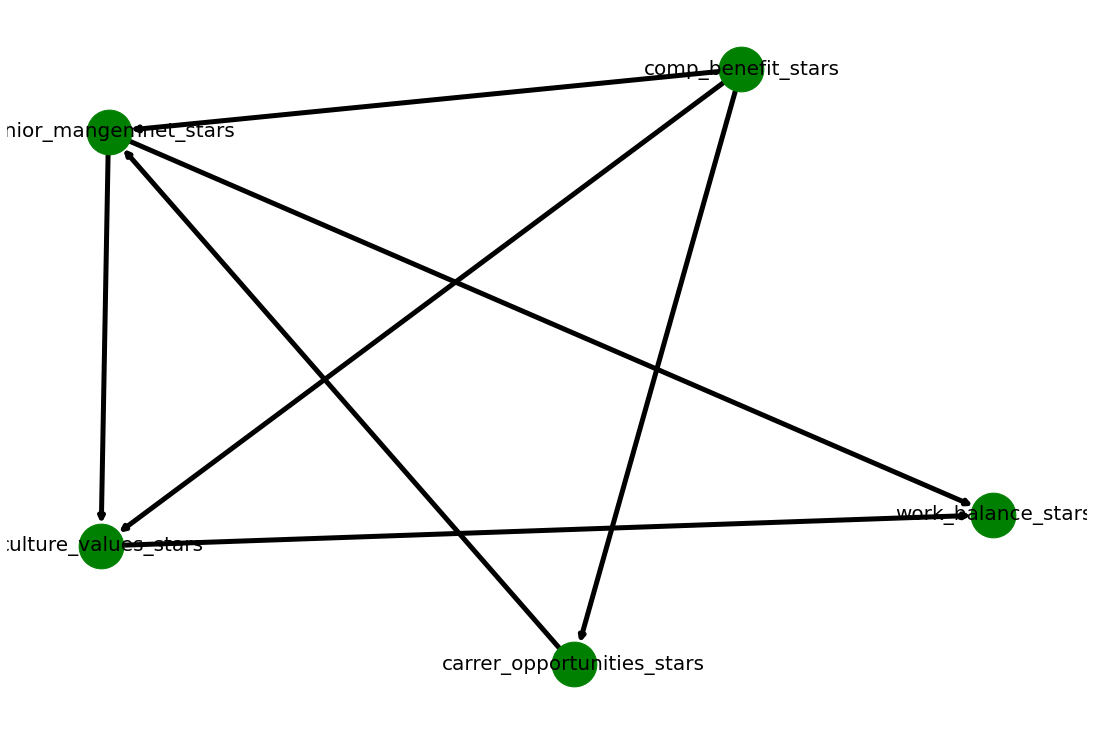

In [12]:
hc = HillClimbSearch(df_train_app, scoring_method=K2Score(df_train_app))  #use the training set to build the model
#The score to be optimized during structure estimation.  
#  Supported structure scores: k2score, bdeuscore, bicscore.
best_model = hc.estimate()
print(best_model)
edges = list(best_model.edges())
print(edges)
model = BayesianModel(edges)

%matplotlib inline
plt.figure(figsize=(15,10))

nx.draw(model, pos= nx.spring_layout(model), with_labels=True, node_size=2000,
        node_color="green", width = 5, font_size = 20)
plt.show()

In [17]:
causal_graph_apple = """
digraph {
work_balance_stars;
carrer_opportunities_stars;
comp_benefit_stars;
senior_mangemnet_stars;

culture_values_stars -> work_balance_stars;
carrer_opportunities_stars -> senior_mangemnet_stars;
comp_benefit_stars -> carrer_opportunities_stars;
comp_benefit_stars -> culture_values_stars;
comp_benefit_stars -> senior_mangemnet_stars;
senior_mangemnet_stars -> culture_values_stars;
senior_mangemnet_stars -> work_balance_stars
}
"""

### Focus on the relation between senior_mangment and work_balance

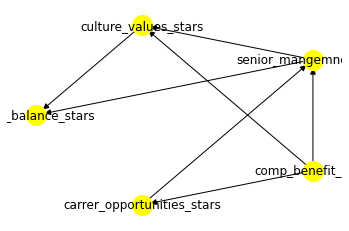

In [20]:
#here we use the DAG schema obtained with Hillclimsearch algorithm
outcome='work_balance_stars'
treatment='senior_mangemnet_stars'

model_app= CausalModel(
        data = df_train_app,
        graph=causal_graph_apple.replace("\n", " "),
        treatment=treatment,
        outcome=outcome
)
model_app.view_model()
#display(Image(filename='causal_model.png'))

In [13]:
model.fit(df_train_app, estimator=MaximumLikelihoodEstimator)
infer = VariableElimination(model)

In [14]:
print(infer.query(variables=['work_balance_stars', 'senior_mangemnet_stars'], joint= True))

Eliminating: comp_benefit_stars: 100%|██████████████████████████████████████████████████| 3/3 [00:00<00:00, 124.99it/s]

+-----------------------+---------------------------+--------------------------------------------------+
| work_balance_stars    | senior_mangemnet_stars    |   phi(work_balance_stars,senior_mangemnet_stars) |
+=======================+===========================+==================================================+
| work_balance_stars(1) | senior_mangemnet_stars(1) |                                           0.0519 |
+-----------------------+---------------------------+--------------------------------------------------+
| work_balance_stars(1) | senior_mangemnet_stars(2) |                                           0.0220 |
+-----------------------+---------------------------+--------------------------------------------------+
| work_balance_stars(1) | senior_mangemnet_stars(3) |                                           0.0246 |
+-----------------------+---------------------------+--------------------------------------------------+
| work_balance_stars(1) | senior_mangemnet_stars(4) |  

In [15]:
for i in range(1,6):
    print(infer.query(variables=['work_balance_stars'], evidence={'senior_mangemnet_stars': i}))


Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Eliminating: culture_values_stars:   0%|                                                         | 0/3 [00:00<?, ?it/s]

Eliminating: carrer_opportunities_stars:   0%|                                                   | 0/3 [00:00<?, ?it/s]

Eliminating: comp_benefit_stars: 100%|██████████████████████████████████████████████████| 3/3 [00:00<00:00, 187.54it/s]

Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Eliminating: culture_values_stars:   0%|                                                         | 0/3 [00:00<?, ?it/s]

Eliminating: carrer_opportuniti

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.4504 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.2519 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.1718 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.0916 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.0344 |
+-----------------------+---------------------------+
+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.1786 |
+-----------------------+---------------------------+
| work_balance_stars(2) |   

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]


Eliminating: culture_values_stars:   0%|                                                         | 0/3 [00:00<?, ?it/s]


Eliminating: carrer_opportunities_stars:   0%|                                                   | 0/3 [00:00<?, ?it/s]


Eliminating: comp_benefit_stars: 100%|██████████████████████████████████████████████████| 3/3 [00:00<00:00, 187.45it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]




+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.0300 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.1267 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.2650 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.4083 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.1700 |
+-----------------------+---------------------------+


Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



Eliminating: culture_values_stars:   0%|                                                         | 0/3 [00:00<?, ?it/s]



Eliminating: carrer_opportunities_stars:   0%|                                                   | 0/3 [00:00<?, ?it/s]



Eliminating: comp_benefit_stars: 100%|██████████████████████████████████████████████████| 3/3 [00:00<00:00, 187.48it/s]

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.0172 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.0613 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.1513 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.2318 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.5383 |
+-----------------------+---------------------------+


In [16]:
for i in range(1,6):
    print(infer.query(variables=['work_balance_stars'], evidence={'senior_mangemnet_stars': i}))





  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]




  0%|                                                                                            | 0/3 [00:00<?, ?it/s]




Eliminating: culture_values_stars:   0%|                                                         | 0/3 [00:00<?, ?it/s]




Eliminating: carrer_opportunities_stars:   0%|                                                   | 0/3 [00:00<?, ?it/s]




Eliminating: comp_benefit_stars: 100%|██████████████████████████████████████████████████| 3/3 [00:00<00:00, 187.47it/s]

Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Eliminating: c

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.4504 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.2519 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.1718 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.0916 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.0344 |
+-----------------------+---------------------------+
+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.1786 |
+-----------------------+---------------------------+
| work_balance_stars(2) |   



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]


Eliminating: culture_values_stars:   0%|                                                         | 0/3 [00:00<?, ?it/s]


Eliminating: carrer_opportunities_stars:   0%|                                                   | 0/3 [00:00<?, ?it/s]


Eliminating: comp_benefit_stars: 100%|██████████████████████████████████████████████████| 3/3 [00:00<00:00, 375.12it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]


Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]





+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.0300 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.1267 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.2650 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.4083 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.1700 |
+-----------------------+---------------------------+


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



Eliminating: culture_values_stars:   0%|                                                         | 0/3 [00:00<?, ?it/s]



Eliminating: carrer_opportunities_stars:   0%|                                                   | 0/3 [00:00<?, ?it/s]



Eliminating: comp_benefit_stars: 100%|██████████████████████████████████████████████████| 3/3 [00:00<00:00, 374.90it/s]

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.0172 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.0613 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.1513 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.2318 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.5383 |
+-----------------------+---------------------------+


In [ ]:
estimands = model_app.identify_effect()

In [ ]:
estimate = model_app.estimate_effect(estimands,
                                 method_name = 'backdoor.linear_regression',
                                 test_significance=True, confidence_intervals=True)                           
print(estimate)

In [ ]:
methods = ["random_common_cause","data_subset_refuter","placebo_treatment_refuter"]
for mode in methods:
    refutel = model_app.refute_estimate(estimands,estimate, mode)
    print(refutel)

### Focus on the relation between culture_values and work_balance

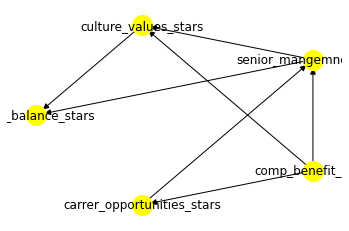

In [21]:
#here we use the DAG schema obtained with Hillclimsearch algorithm
outcome='work_balance_stars'
treatment='culture_values_stars'

model_app= CausalModel(
        data = df_train_app,
        graph=causal_graph_apple.replace("\n", " "),
        treatment=treatment,
        outcome=outcome
)
model_app.view_model()
#display(Image(filename='causal_model.png'))

In [13]:
model.fit(df_train_app, estimator=MaximumLikelihoodEstimator)
infer = VariableElimination(model)

In [22]:
print(infer.query(variables=['work_balance_stars', 'culture_values_stars'], joint= True))

Eliminating: senior_mangemnet_stars: 100%|██████████████████████████████████████████████| 3/3 [00:00<00:00, 235.85it/s]

+-----------------------+-------------------------+------------------------------------------------+
| work_balance_stars    | culture_values_stars    |   phi(work_balance_stars,culture_values_stars) |
+=======================+=========================+================================================+
| work_balance_stars(1) | culture_values_stars(1) |                                         0.0281 |
+-----------------------+-------------------------+------------------------------------------------+
| work_balance_stars(1) | culture_values_stars(2) |                                         0.0158 |
+-----------------------+-------------------------+------------------------------------------------+
| work_balance_stars(1) | culture_values_stars(3) |                                         0.0224 |
+-----------------------+-------------------------+------------------------------------------------+
| work_balance_stars(1) | culture_values_stars(4) |                                        

In [23]:
for i in range(1,6):
    print(infer.query(variables=['work_balance_stars'], evidence={'culture_values_stars': i}))


Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Eliminating: carrer_opportunities_stars:   0%|                                                   | 0/3 [00:00<?, ?it/s]

Eliminating: comp_benefit_stars:   0%|                                                           | 0/3 [00:00<?, ?it/s]

Eliminating: senior_mangemnet_stars: 100%|██████████████████████████████████████████████| 3/3 [00:00<00:00, 142.61it/s]

Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Eliminating: carrer_opportunities_stars:   0%|                                                   | 0/3 [00:00<?, ?it/s]

Eliminating: comp_benefit_stars

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.6531 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.1939 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.0612 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.0612 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.0306 |
+-----------------------+---------------------------+
+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.3495 |
+-----------------------+---------------------------+
| work_balance_stars(2) |   


Eliminating: senior_mangemnet_stars: 100%|██████████████████████████████████████████████| 3/3 [00:00<00:00, 375.08it/s]

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.0367 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.1091 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.2141 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.2907 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.3494 |
+-----------------------+---------------------------+


In [24]:
for i in range(1,6):
    print(infer.query(variables=['work_balance_stars'], evidence={'culture_values_stars': i}))


Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Eliminating: carrer_opportunities_stars:   0%|                                                   | 0/3 [00:00<?, ?it/s]

Eliminating: comp_benefit_stars:   0%|                                                           | 0/3 [00:00<?, ?it/s]

Eliminating: senior_mangemnet_stars: 100%|██████████████████████████████████████████████| 3/3 [00:00<00:00, 362.05it/s]


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]


Eliminating: carrer_opportun

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.6531 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.1939 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.0612 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.0612 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.0306 |
+-----------------------+---------------------------+
+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.3495 |
+-----------------------+---------------------------+
| work_balance_stars(2) |   

In [25]:
estimands = model_app.identify_effect()

In [26]:
estimate = model_app.estimate_effect(estimands,
                                 method_name = 'backdoor.linear_regression',
                                 test_significance=True, confidence_intervals=True)                           
print(estimate)

Finding Elimination Order: : 100%|███████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.25s/it]

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                                                                   
──────────────────────(Expectation(work_balance_stars|senior_mangemnet_stars,c
d[cultureᵥₐₗᵤₑₛ ₛₜₐᵣₛ]                                                        

                                              
arrer_opportunities_stars,comp_benefit_stars))
                                              
Estimand assumption 1, Unconfoundedness: If U→{culture_values_stars} and U→work_balance_stars then P(work_balance_stars|culture_values_stars,senior_mangemnet_stars,carrer_opportunities_stars,comp_benefit_stars,U) = P(work_balance_stars|culture_values_stars,senior_mangemnet_stars,carrer_opportunities_stars,comp_benefit_stars)

## Realized estimand
b: work_balance_stars~culture_values_stars+senior_mangemnet_stars+carrer_opportunities_stars+comp_benefit_stars
Target units: at

In [27]:
methods = ["random_common_cause","data_subset_refuter","placebo_treatment_refuter"]
for mode in methods:
    refutel = model_app.refute_estimate(estimands,estimate, mode)
    print(refutel)

Refute: Add a Random Common Cause
Estimated effect:0.20901064816099124
New effect:0.20953537236545738

Refute: Use a subset of data
Estimated effect:0.20901064816099124
New effect:0.20816786891101327
p value:0.47

Refute: Use a Placebo Treatment
Estimated effect:0.20901064816099124
New effect:-0.001054270889475939
p value:0.5

